In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
# Print the shape of features and labels
print("Feature matrix (X) shape:", X.shape)
print("Target vector (y) shape:", y.shape)

# Preview the first 10 samples
print("\nFirst 10 Feature Rows (X):")
print(X[:10])

print("\nFirst 10 Labels (y):")
print(y[:10])

Feature matrix (X) shape: (300, 2)
Target vector (y) shape: (300,)

First 10 Feature Rows (X):
[[ 0.86439552 -0.26450934]
 [ 2.45115375 -0.11754986]
 [-0.35071234  0.44921105]
 [ 0.74129551  0.43291883]
 [ 1.18875554 -0.51830128]
 [ 1.0005884  -0.31441471]
 [ 0.32149225 -0.13055976]
 [-0.4035489   0.66135984]
 [ 0.76293653 -0.02301392]
 [ 0.31326429  0.02007952]]

First 10 Labels (y):
[1 1 1 0 1 1 1 0 0 1]


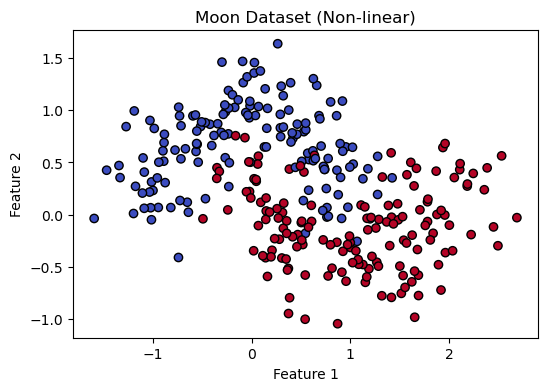

In [13]:
# Generate dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Moon Dataset (Non-linear)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 210, Testing samples: 90


In [15]:
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

# Evaluate
y_pred_linear = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.8888888888888888


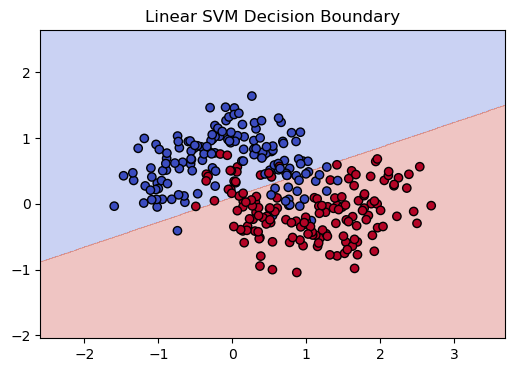

In [16]:
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")

In [17]:
rbf_svm = SVC(kernel='rbf', gamma=0.5, C=1.0)
rbf_svm.fit(X_train, y_train)

# Evaluate
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9


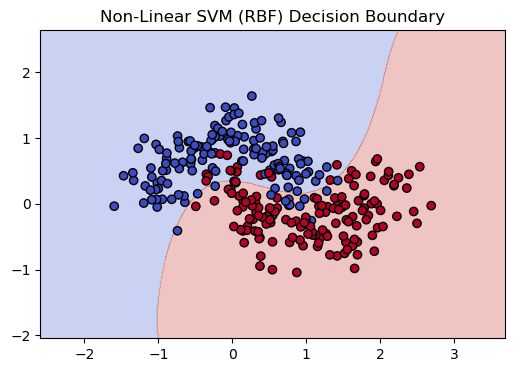

In [18]:
plot_decision_boundary(rbf_svm, X, y, "Non-Linear SVM (RBF) Decision Boundary")

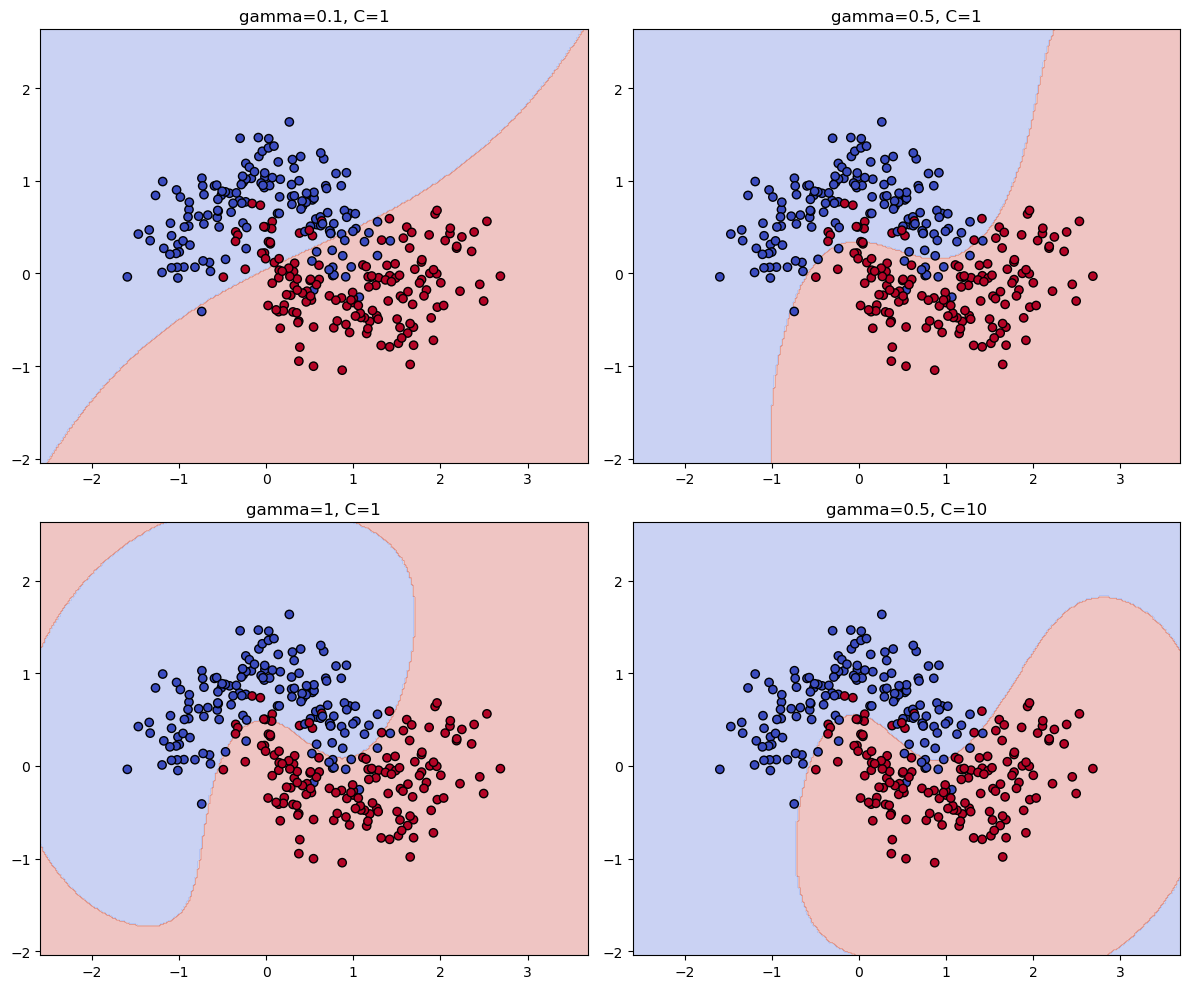

In [19]:
# Try multiple gamma & C values
params = [(0.1, 1), (0.5, 1), (1, 1), (0.5, 10)]
plt.figure(figsize=(12,10))

for i, (gamma, C) in enumerate(params, 1):
    model = SVC(kernel='rbf', gamma=gamma, C=C)
    model.fit(X_train, y_train)
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.subplot(2,2,i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"gamma={gamma}, C={C}")

plt.tight_layout()
plt.show()

Polynomial SVM Accuracy: 0.8888888888888888


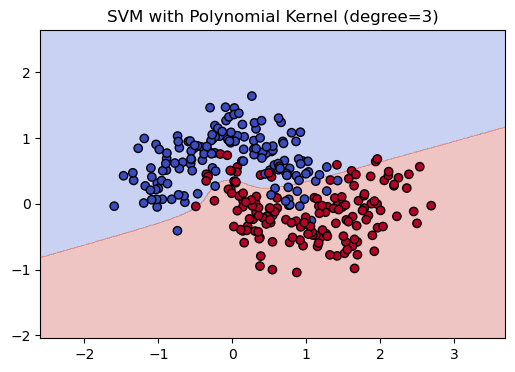

In [20]:
# Train SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')  # degree=3 is default
poly_svm.fit(X_train, y_train)

# Evaluate model
y_pred_poly = poly_svm.predict(X_test)
print("Polynomial SVM Accuracy:", accuracy_score(y_test, y_pred_poly))

# Visualize decision boundary
plot_decision_boundary(poly_svm, X, y, "SVM with Polynomial Kernel (degree=3)")